In [1]:
import math
import cmath
import random
import statistics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import copy

# 9.1

In [19]:
def simulate(a_start, b_start):
    sims = 10000
    alice_wins = 0
    
    for i in range(0, sims):
        a = a_start
        b = b_start
        while a > 0 and b > 0:
            flip = random.randint(0,1)
            if flip == 0:
                a += 1
                b -= 1
            else:
                a -= 1
                b += 1
        if b == 0:
            alice_wins += 1

    return alice_wins/sims

In [23]:
simulate(1, 1)
# a=1, b=1 ==> 50%

0.5008

In [24]:
simulate(2, 1)
# a=2, b=1 ==> 66%

0.6606

In [25]:
simulate(1, 2)
# a=1, b=2 ==> 33%

0.3353

In [26]:
simulate(5, 1)
# a=5, b=1 ==> 83%

0.8308

In [27]:
simulate(6, 4)

0.6033

In [28]:
simulate(8, 3)

0.738

In [29]:
# alice win chance = a/(a+b)

0.7272727272727273

# 9.2

In [16]:
sims = 10000
infin_cnt = 0

for i in range(0, sims):
    amoebas = 1
    while True:
        #print("total amoebas: " + str(amoebas))
        if amoebas > 100:
            infin_cnt += 1
            break
        elif amoebas == 0:
            #print('Population died')
            break
        change = 0
        for i in range(0, amoebas):
            survive = random.choices([0,1], [1/4, 3/4])[0]
            if survive:
                change += 1
            else:
                change -= 1
        amoebas = amoebas + change

In [17]:
infin_cnt/sims

0.6638

In [21]:
# 1 - (1-p)/p
1 - (1-(3/4))/((3/4))

0.6666666666666667

# 9.3

In [20]:
def simulate(n):
    sims = 10000
    viewed_cnts = []
    heights = list(range(1,n+1))
    
    for i in range(0, sims):
        random.shuffle(heights)
        
        cnt = 0
        in_front = []
        for person in heights:
            if all(person > x for x in in_front):
                cnt += 1
            in_front.append(person)
        viewed_cnts.append(cnt)
    
    return sum(viewed_cnts)/len(viewed_cnts)

In [23]:
simulate(1)

1.0

In [24]:
simulate(2)

1.498

In [25]:
simulate(3)

1.8286

In [26]:
simulate(4)

2.0701

In [27]:
simulate(5)

2.277

In [28]:
simulate(6)

2.4608

In [29]:
inputs = list(range(1, 11))
outputs = []

for i in inputs:
    outputs.append(simulate(i))

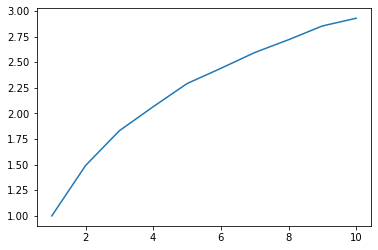

In [31]:
plt.plot(inputs, outputs)

In [37]:
eulers_constant = .5772157
n = 5
(math.log(n) + eulers_constant), simulate(n)

(2.1866536124341005, 2.2703)

In [46]:
eulers_constant = .5772157
n = 4
(math.log(n) + eulers_constant), simulate(n)

(1.9635100611198906, 2.0807)

In [47]:
# todo: verify we are getting correct answer

# 9.4

In [3]:
# TODO

# 9.5

In [14]:
sims = 100000
cnt = 0

for i in range(0, sims):
    tails = 0
    for i in range(0, 10):
        flip = random.randint(0,1)
        if flip == 0:
            tails += 1
        else:
            tails = 0
        if tails > 1:
            cnt += 1
            break

In [15]:
(sims-cnt)/sims

0.14187

In [16]:
9/64

0.140625

# 9.6

In [43]:
def simulate(n, p):
    sims = 10000
    fails = 0
    
    for i in range(0, sims):
        flip = 0
        for i in range(0, n):
            transmit = random.choices([0,1], [1-p, p])[0]
            if transmit == 0:
                flip += 1
        if flip % 2 == 1:
            fails += 1
    return 1-(fails/sims)

In [44]:
simulate(1, .5)

0.4929

In [45]:
simulate(2, .5)

0.5013000000000001

In [46]:
simulate(3, .5)

0.5018

In [47]:
simulate(1, .75)

0.7492

In [48]:
simulate(2, .75)

0.6194999999999999

In [49]:
simulate(3, .75)

0.5647

In [51]:
simulate(8, .75)

0.504

In [52]:
def solution(n,p):
    return ((1+(2*p-1)**n)/2)

In [53]:
solution(1, .75)

0.75

In [54]:
solution(2, .75)

0.625

In [55]:
solution(3, .75)

0.5625

In [56]:
solution(8, .75)

0.501953125

# 9.7

In [30]:
sims = 10000
tosses = []

for i in range(0, sims):
    six = False
    cnt = 0
    while True:
        cnt += 1
        roll = random.randint(1,6)
        if roll == 6:
            if six:
                tosses.append(cnt)
                break
            else:
                six = True
        else:
            six = False

In [31]:
sum(tosses)/len(tosses)

41.9462

In [32]:
expected_6 = 6
expected_two_6 = 6**2 + 6

In [33]:
expected_two_6

42

# 9.8

In [2]:
# TODO

# 9.9

In [24]:
end1 = list(range(1,2019))
end2 = list(range(1,2019))
loops = []
sims = 1000

for i in range(0, sims):
    random.shuffle(end2)
    loop = 0
    for idx, val in enumerate(end2):
        if val == end1[idx]:
            loop += 1
    loops.append(loop)

In [25]:
sum(loops)/len(loops)

0.995

In [26]:
# TODO: doing something wrong

# 9.10

In [2]:
# TODO

# 9.11

In [3]:
# TODO

# 9.12

In [13]:
games = []
sims = 10000

for i in range(0, sims):
    a_wins = 0
    b_wins = 0
    cnt = 0
    
    while a_wins < 4 and b_wins < 4:
        cnt += 1
        winner = random.randint(0,1)
        if winner:
            a_wins +=1
        else:
            b_wins +=1
    games.append(cnt)

In [14]:
sum(games)/len(games)

5.824

In [15]:
93/16

5.8125

# 9.13

In [37]:
def checkMatchup(matchups):
    for match in matchups:
        if 1 in match and 2 in match:
            return True
    return False


sims = 10000
cnt = 0
players = list(range(1,33))

for i in range(0, sims):
    random.shuffle(players)
    remaining_players = players
    for game in range(0, 5):
        matchups = [remaining_players[i:i+2] for i in range(0, len(remaining_players), 2)]
        if checkMatchup(matchups):
            cnt += 1
            break
        remaining_players = []
        for match in matchups:
            # let first player win every game
            remaining_players.append(match[0])
        # do we need this?
        random.shuffle(remaining_players)

In [38]:
cnt/sims

0.0646

In [45]:
# 32 = 2^k participants, k=5
total_games = 2**5-1
total_possible_games = (2**(5-1))*(2**5-1)
prob = total_games/total_possible_games

In [46]:
prob

0.0625

In [47]:
1/16

0.0625

# 9.14

In [10]:
sims = 10000
totals = []

for i in range(0, sims):
    total = 0
    while total <= 12:
        total += random.randint(1,6)
    totals.append(total)

In [11]:
poss = [13,14,15,16,17]
for p in poss:
    print(str(p) + ": " + str(totals.count(p)))

13: 2731
14: 2401
15: 1885
16: 1510
17: 975


In [12]:
sum(totals)/len(totals)

14.7091

In [13]:
# ~14.7 is the expected total
# 13 is the most likely

# 9.15

In [2]:
# p_s = p_b
p = .4/(1-.4)

In [3]:
p

0.6666666666666667

In [4]:
2/3

0.6666666666666666

In [5]:
# TODO: prove this better